# NN1

## Implementacja sieci neuronowej typu MLP

Na tych zajęciach należy zaimplementować sieć neuronową typu MLP, w której można ustawić: liczbę warstw, liczbę neuronów w każdej z warstw i wagi poszczególnych połączeń, w tym biasów. Sieć ma używać sigmoidalnej funkcji aktywacji. Na wyjściu dopuszczana jest funkcja liniowa.

#### Implementacja

Implementacja sieci musi być przygotowana w taki sposób, żeby łatwo zmieniać:

- Architekturę, to znaczy liczbę wejść, wyjść, neuronów w warstwach ukrytych.
- Funkcję aktywacji.

Tak przygotowaną implementację należy następnie wykorzystać do rozwiązania zadania regresji na dostarczonych danych. Parametry sieci należy dobrać ręcznie, tak aby uzyskać możliwie dobre wyniki na zbiorach danych (zbudować po jednej sieci dla każdego zbioru):

- square-simple
- steps-large

#### Rozważane architektury sieci

- jedna warstwa ukryta, 5 neuronów,
- jedna warstwa ukryta, 10 neuronów,
- dwie warstwy ukryte, po 5 neuronów każda.

Aby otrzymać 2 punkty, MSE na [nieznormalizowanym] zbiorze testowym nie może przekraczać wartości 9.

#### Uwagi

- Wyliczanie MSE na zbiorze nieznormalizowanym nie oznacza, że sieć musi wewnętrznie działać na danych nieznormalizowanych. Wewnętrznie można normalizować i standaryzować dane.
- Podpowiedzi do ręcznego wyznaczania wag sieci: w sieci z jednym wejściem i dwiema warstwami można sobie zaplanować, w jakim zakresie wartości wejściowej x poszczególne neurony pierwszej warstwy będą aktywne (istotnie większe od 0), a po uzyskaniu aktywnych neuronów w odpowiednich przedziałach przemnożyć wynikowe wartości przez współczynniki w drugiej warstwie tak, żeby dopasować uzyskane "piki" do kształtu funkcji. To powinno wystarczyć dla zbioru steps. Rozszerzenie o zbiór square trzeba wymyślić samodzielnie.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def linear(x):
    return x


class MLP:
    def __init__(self, layer_sizes,
                 hidden_activation='sigmoid',
                 output_activation='linear'):
        self.activation_functions = {
            'sigmoid': sigmoid,
            'linear': linear
        }

        self.hidden_activation = self.activation_functions[hidden_activation]
        self.output_activation = self.activation_functions[output_activation]

        self.layer_sizes = layer_sizes

        self.weights = []
        self.biases = []

        for i in range(len(layer_sizes) - 1):
            w = np.random.randn(layer_sizes[i], layer_sizes[i + 1])
            b = np.zeros((layer_sizes[i + 1],))
            self.weights.append(w)
            self.biases.append(b)


    def forward(self, X):
        if X.ndim == 1:
            X = X.reshape(1, -1)

        activation = X
        activations = [X]
        for i in range(len(self.weights) - 1):
            weights = self.weights[i]
            biases= self.biases[i]
            Y = activation @ self.weights[i] + self.biases[i]
            activation = self.hidden_activation(Y)
            activations.append(activation)

        Y = activation @ self.weights[-1] + self.biases[-1]
        activation = self.output_activation(Y)
        activations.append(activation)

        return activations


    def predict(self, X):
        return self.forward(X)[-1]

    def set_weights_and_biases(self, layer_idx, W, b):
        self.weights[layer_idx] = W
        self.biases[layer_idx] = b

    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

### Zbiór steps-large

MSE =  6.769603936282327


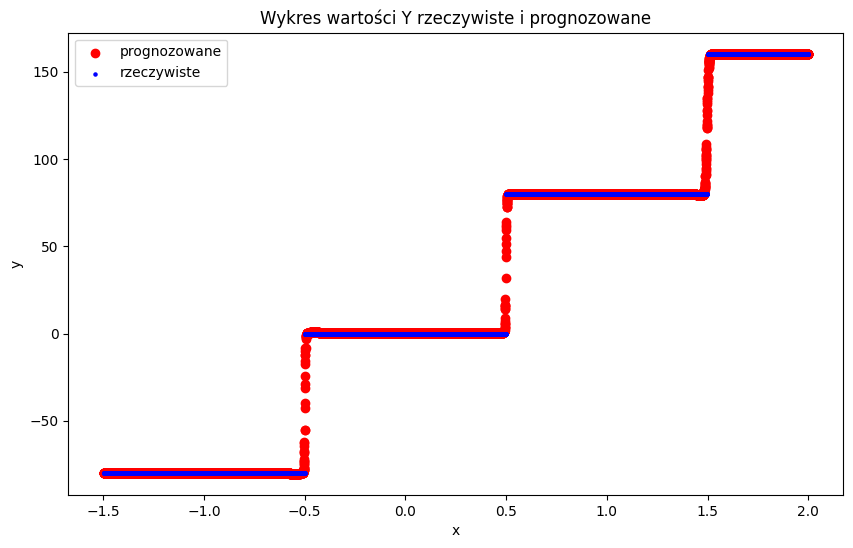

Na zbiorze testowym:
MSE =  4.013250210330878


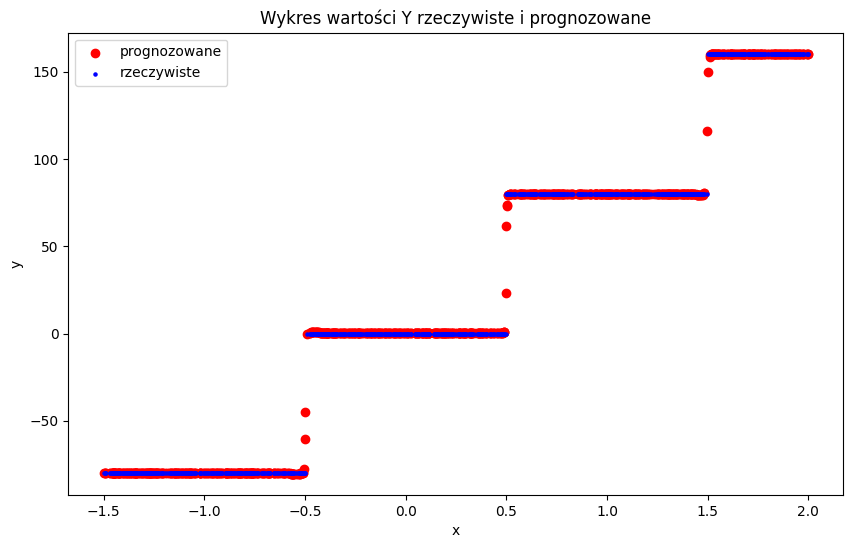

In [10]:
mlp = MLP([1, 5, 5, 1])

W0 = np.array([[-44.5, -33.2, 52, -58.6, 32.3]])

W1 = np.array([
    [-2.6, -5.6, -2.8, -34.6, -2.5],
    [-1.4, 5.3, -2.4, -28.4, -2.4],
    [16.8, -1.8, 2.8, 3.3, 13.2],
    [-1.6, -0.5, -45.4, 11.8, -3],
    [ 4, -0.3, 2.4, 2.9, 13.8]])

W2 = np.array([[38.8],[35.1], [78.6], [79.3], [44.5]])

b0 = np.array([-22.4, -16.8, -77.9, 29, -48.3])

b1 = np.array([-9.8, -2.1, 20.4, 16.9, -13.7])

b2 = np.array([-81.6])


mlp.set_weights_and_biases(0, W0, b0)
mlp.set_weights_and_biases(1, W1, b1)
mlp.set_weights_and_biases(2, W2, b2)

df = pd.read_csv('mio1/regression/steps-large-training.csv', index_col=0)
X=df.iloc[:,0].to_numpy().reshape(-1,1)
y_true=df.iloc[:,1].to_numpy().reshape(-1,1)
y_pred = mlp.predict(X)
mse_error = mlp.mse(y_true, y_pred)

print("MSE = ", mse_error)


plt.figure(figsize=(10, 6))
plt.scatter(X, y_pred, label='prognozowane', color='red')
plt.scatter(X, y_true, label='rzeczywiste', color='blue', s=5)
plt.title('Wykres wartości Y rzeczywiste i prognozowane')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print("Na zbiorze testowym:")

df = pd.read_csv('mio1/regression/steps-large-test.csv', index_col=0)
X=df.iloc[:,0].to_numpy().reshape(-1,1)
y_true=df.iloc[:,1].to_numpy().reshape(-1,1)
y_pred = mlp.predict(X)
mse_error = mlp.mse(y_true, y_pred)

print("MSE = ", mse_error)


plt.figure(figsize=(10, 6))
plt.scatter(X, y_pred, label='prognozowane', color='red')
plt.scatter(X, y_true, label='rzeczywiste', color='blue', s=5)
plt.title('Wykres wartości Y rzeczywiste i prognozowane')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Zbiór square-simple

MSE =  6.488768570099674


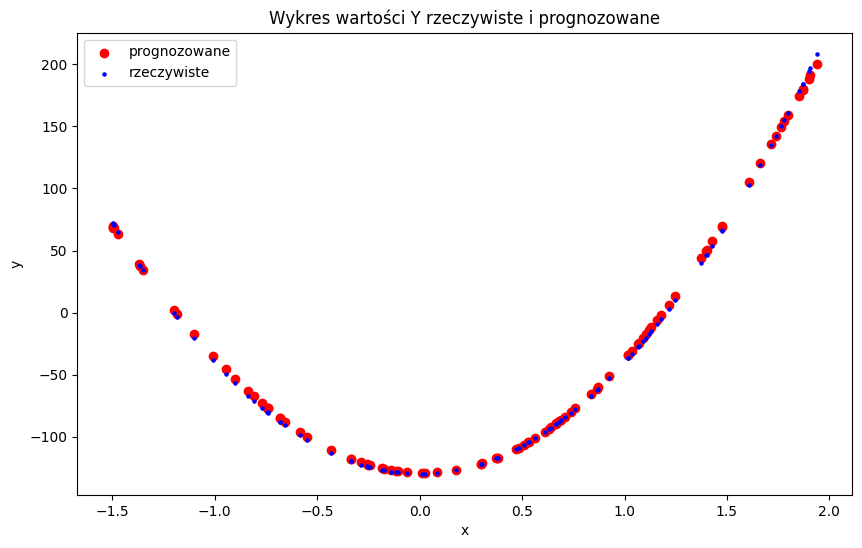

Na zbiorze testowym:
MSE =  7.604827029737814


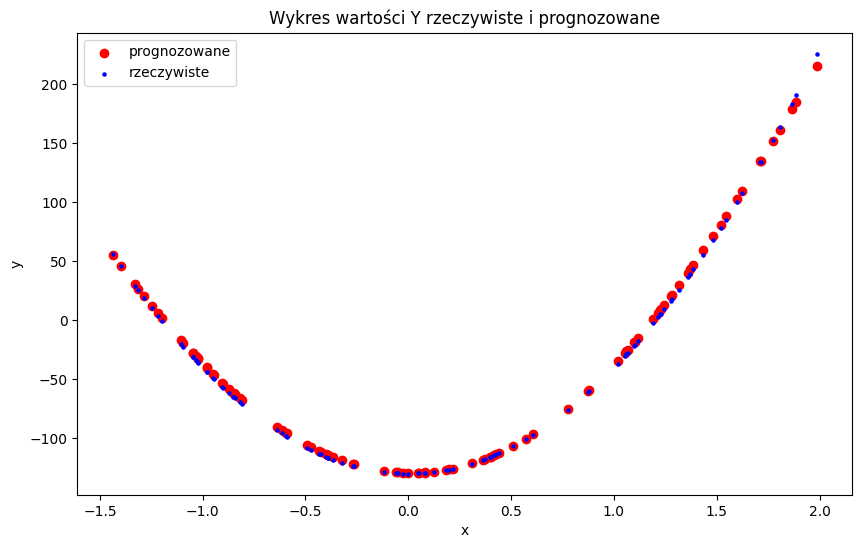

In [ ]:
mlp = MLP([1, 5, 1])

W0 = np.array([[ 1.32, -1.3,  0.2,  1.1, -0.8]])

W1 = np.array([[450],
    [550],
    [550],
    [550],
    [550]])

b0 = np.array([-2.4, -2.4, -1.4, -2.4, -1.7])

b1 = np.array([-452])

mlp.set_weights_and_biases(0, W0, b0)
mlp.set_weights_and_biases(1, W1, b1)

df = pd.read_csv('mio1/regression/square-simple-training.csv', index_col=0)

X=df.iloc[:,0].to_numpy().reshape(-1,1)
y_true=df.iloc[:,1].to_numpy().reshape(-1,1)
y_pred = mlp.predict(X)
mse_error = mlp.mse(y_true, y_pred)

print("MSE = ", mse_error)

plt.figure(figsize=(10, 6))
plt.scatter(X, y_pred, label='prognozowane', color='red')
plt.scatter(X, y_true, label='rzeczywiste', color='blue', s=5)
plt.title('Wykres wartości Y rzeczywiste i prognozowane - zbiór treningowy')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print("Na zbiorze testowym:")

df = pd.read_csv('mio1/regression/square-simple-test.csv', index_col=0)
X=df.iloc[:,0].to_numpy().reshape(-1,1)
y_true=df.iloc[:,1].to_numpy().reshape(-1,1)
y_pred = mlp.predict(X)
mse_error = mlp.mse(y_true, y_pred)

print("MSE = ", mse_error)

plt.figure(figsize=(10, 6))
plt.scatter(X, y_pred, label='prognozowane', color='red')
plt.scatter(X, y_true, label='rzeczywiste', color='blue', s=5)
plt.title('Wykres wartości Y rzeczywiste i prognozowane - zbiór testowy')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
